# COMP 7150 - Assignment 5
**Deadline: Nov 19, before 1PM**


YOUR NAME: Navya Sri Chitta

#### Dataset Description
The dataset, `Sales.csv`, contains weekly sales data for a chain of retail stores. Each entry provides details on weekly sales figures, economic indicators, and various factors that may influence sales. The data includes:

1. **Store**: The ID of the store (numeric, categorical).
2. **Date**: The date of the entry (weekly intervals).
3. **Weekly_Sales**: The weekly revenue (numeric).
4. **Holiday_Flag**: Indicates whether the week includes a major holiday (binary: 0 = non-holiday, 1 = holiday).
5. **Temperature**: The average temperature for the week (numeric, in Fahrenheit).
6. **Fuel_Price**: The cost of fuel per gallon (numeric).
7. **CPI**: The Consumer Price Index (CPI), an indicator of the average cost of consumer goods (numeric).
8. **Unemployment**: The unemployment rate for the area (numeric).


In [4]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy import stats
from statsmodels.tsa.seasonal import STL




In [6]:
df =  pandas.read_csv('../Datasets/Sales.csv', index_col='Date', parse_dates=['Date'])

print("Column names:", df.columns.tolist())

Column names: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


### Part 1: Temperature Analysis

In this part, you will analyze the `Temperature` column to understand how it varies over time. We are interested in identifying any trends or seasonal patterns.



---

**Question 1:**

Plotting Temperature Over Time

Use `relplot` to create a line plot of `Temperature` over time.

Observe and report any potential trends and seasonal patterns as well as variations.

Hint: set the `aspect` ratio to larger than 1 (e.g. 2) to get a wider figure, which can help you to see things more clearly.


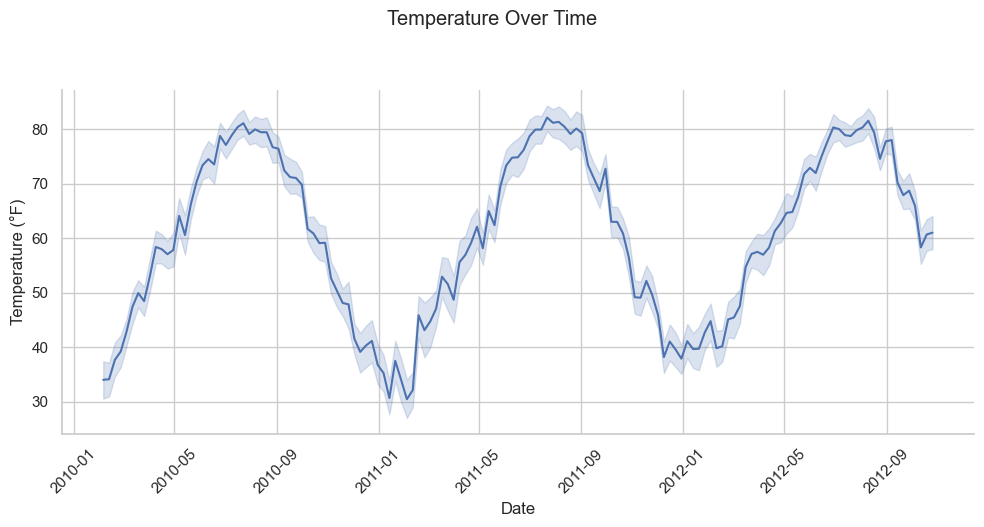

In [8]:
# Set the aspect ratio for better visibility
sns.set(style="whitegrid")

# Create a line plot for Temperature over Time
g = sns.relplot(data=df, x='Date', y='Temperature', kind='line', aspect=2)

# Customize the plot
g.set_axis_labels("Date", "Temperature (°F)")
g.fig.suptitle("Temperature Over Time", y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows a clear seasonal trend. The temperature rises between June to Sept every year and drops at teh begining and end of the year. The shaded area near teh line shows the variation in temperatures. 

---

**Question 2**

Resample the temperature into average monthly values and plot it to see a smoother curve.

Again, describe the trend and seasonality.

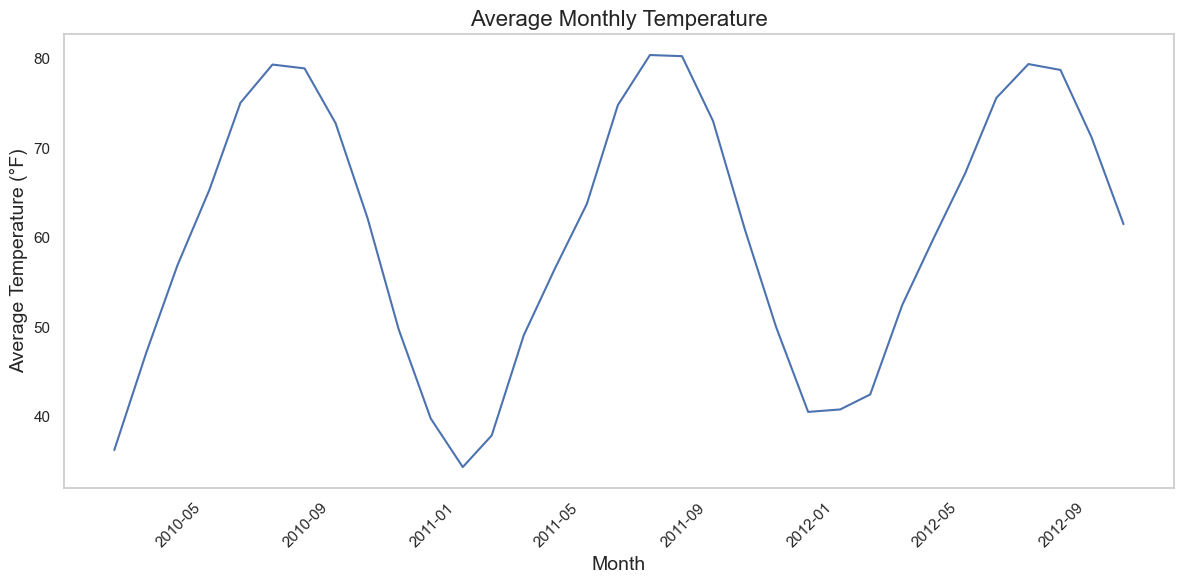

In [10]:
# Resample to average monthly values
monthly_avg_temp = df['Temperature'].resample('ME').mean()

# Plotting the monthly average temperature
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg_temp)
plt.title("Average Monthly Temperature", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Temperature (°F)", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

This is the simplified graph of average monthly pattern. This graph also shows seasonal trend and teh pattern is consistent for the years - 2010, 2011, 2012.

---
**Question 3**

Resample the temperature into average monthly values. Then, use the `lag_plot` to identify the lag that gives highest positive autocorrelation and negative autocorrelation.

Explain your answer.

```python
from pandas.plotting import lag_plot
```

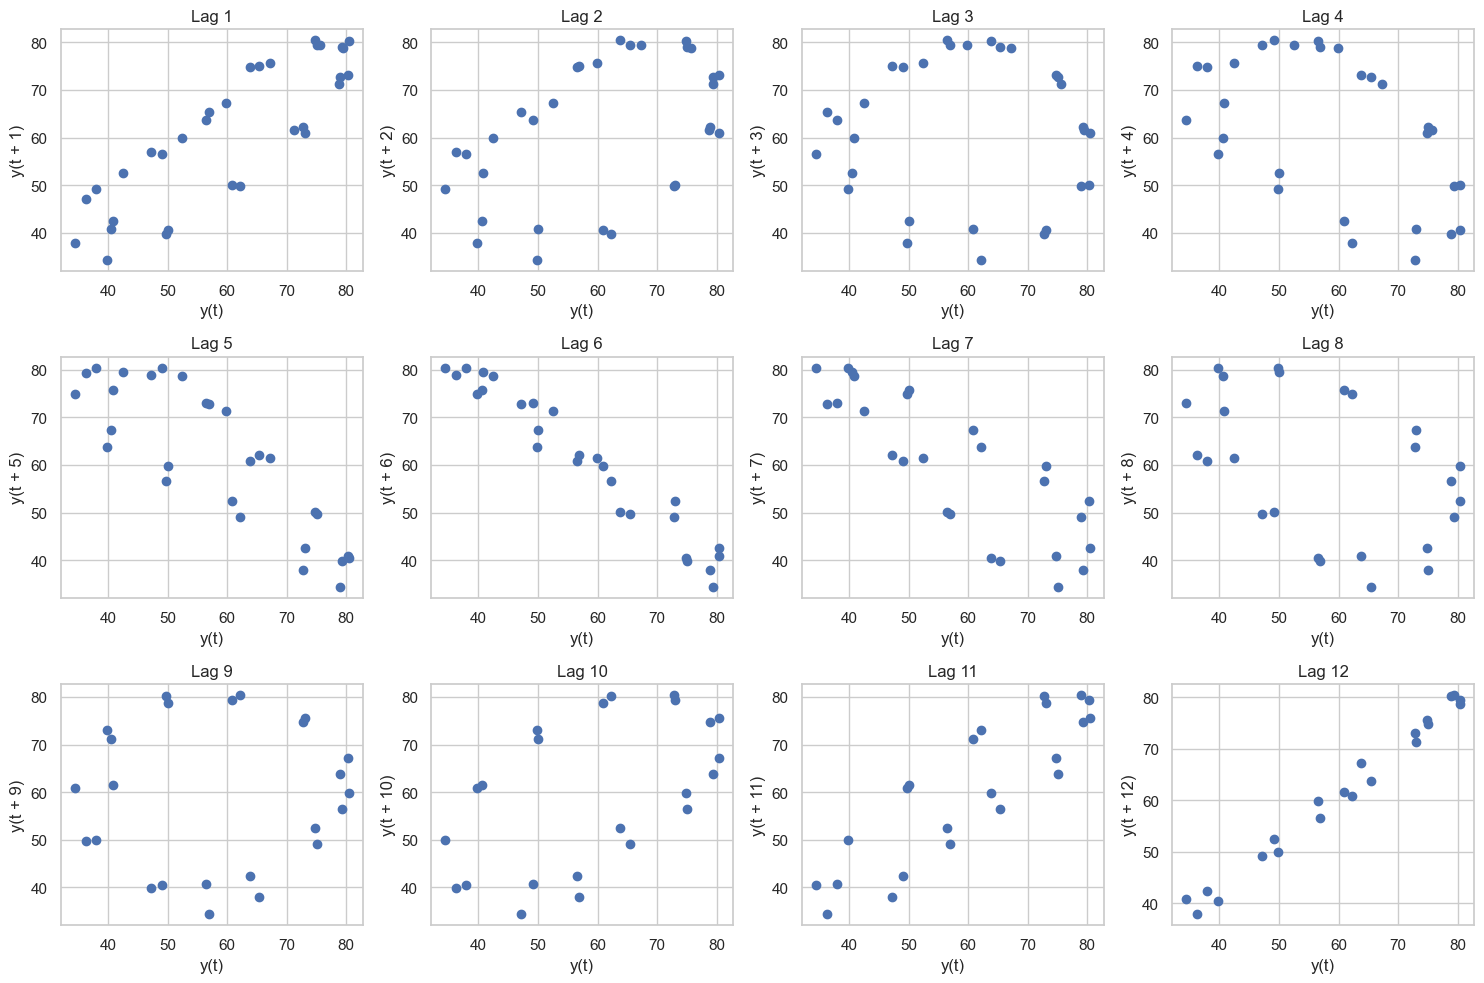

In [14]:
# Create lag plots for different lags
lags = range(1, 13) # Checking lags from 1 to 12 months

plt.figure(figsize=(15,10))

for i in lags:
    plt.subplot(3, 4, i)
    lag_plot(monthly_avg_temp, lag=i)
    plt.title(f'Lag {i}')

plt.tight_layout()
plt.show()

The correlation between a time series and its lagged version is autocorrelation. If the points follow a clear, upward linear trend then its strong positive corelation. If the points follow a clear, downward linear trend then its strong negative corelation. IN this graph Lag 1 shows positive linear relationship and Lag 6 shows strong negative relationship.

---
**Question 4**

Resample the temperature into average monthly values. Then, use the autocorrelation_plot to identify the lag that gives highest positive autocorrelation and negative autocorrelation.

Explain your answer.

```python
from pandas.plotting import autocorrelation_plot
```

In [51]:
from pandas.plotting import autocorrelation_plot
monthly_avg_temp = df['Temperature'].resample('M').mean()

C:\Users\navya\AppData\Local\Temp\ipykernel_33380\3020368546.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['Temperature'].resample('M').mean()


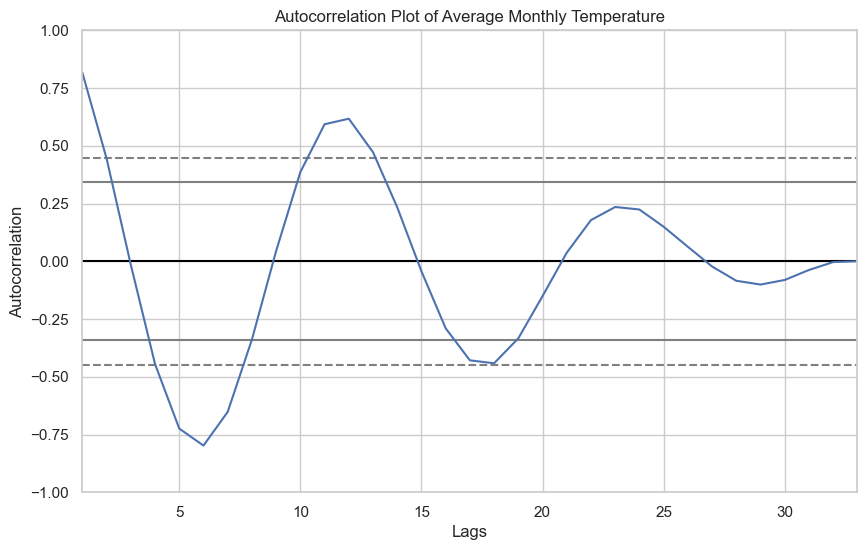

In [18]:
# Plotting the autocorrelation plot
plt.figure(figsize=(10,6))
autocorrelation_plot(monthly_avg_temp)
plt.title("Autocorrelation Plot of Average Monthly Temperature")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid()
plt.show()

In this graph the peaks at certain lags indicate seasonal behavior which is common in temperature data due to yearly patterns. Here Lag 1 is very close to 1 which means there is high correlation between consecutive months due to seasonality. At lag 6  the autocorrelation is below -0.75 which means the temperature is completely dropped.


In [54]:
autocorrelations = {lag: monthly_avg_temp.autocorr(lag=lag) for lag in range(1, 25)}

highest_positive_lag = max(autocorrelations, key=autocorrelations.get)
highest_negative_lag = min(autocorrelations, key=autocorrelations.get)
highest_positive_lag,highest_negative_lag

(24, 18)

---
**Question 5**

Identify three stores with highest average sales, and three stores with lowest average sales.  How much more do the top stores sell more on average than the bottom stores?


In [21]:

average_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = average_sales.nlargest(3, 'Weekly_Sales')
bottom_stores = average_sales.nsmallest(3, 'Weekly_Sales')

# Calculate the difference in average sales
top_average = top_stores['Weekly_Sales'].mean()
bottom_average = bottom_stores['Weekly_Sales'].mean()
difference = top_average - bottom_average

# Display results
print("Top Stores:\n", top_stores)
print("\nBottom Stores:\n", bottom_stores)
print(f"\nTop stores sell on average ${top_average:,.2f} more than bottom stores.")

Top Stores:
     Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06

Bottom Stores:
     Store   Weekly_Sales
32     33  259861.692028
43     44  302748.866014
4       5  318011.810490

Top stores sell on average $2,074,456.08 more than bottom stores.


---
**Question 6**

Using seaborn, create a line plot of total monthly Weekly_Sales over time to observe any trends or fluctuations. Describe any seasonable patterns you observe in terms of sales peaks or dips. Are there any noticeable trends over time?

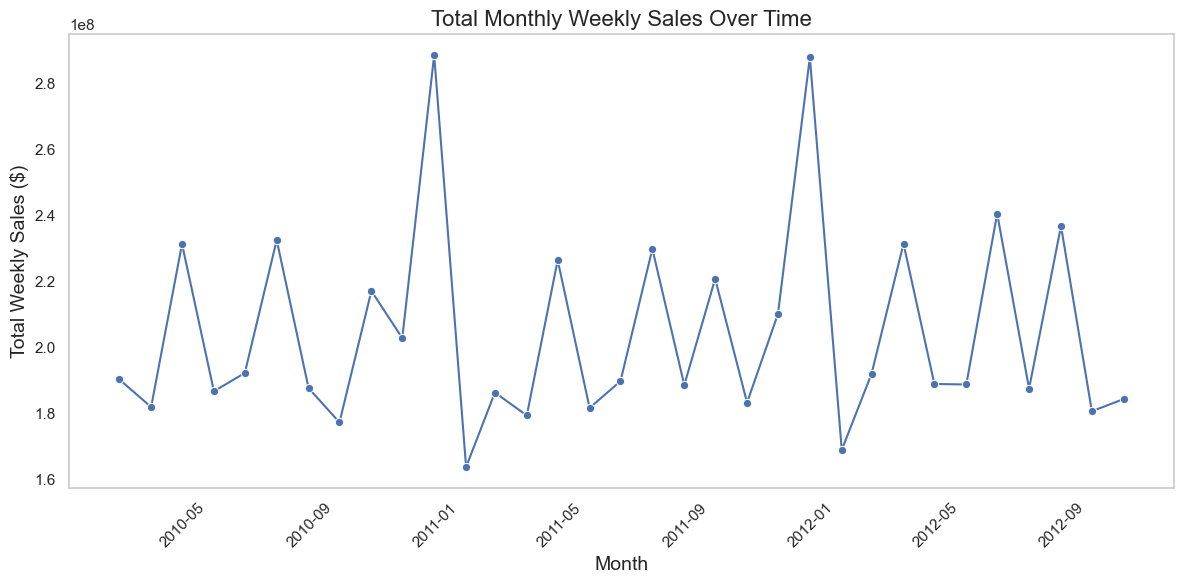

In [64]:
# Resample to total monthly sales
monthly_sales = df.resample('ME').sum()

# Create a line plot for total monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Weekly_Sales', marker='o')
plt.title("Total Monthly Weekly Sales Over Time", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Weekly Sales ($)", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In the month of November and December or end of year, the sales peaks which may be due to festive season. To the rest of te months in the year the sales dips and rises indicating fluctuations in sales. 

---
**Question 7**

Calculate the average Weekly_Sales for holiday weeks (Holiday_Flag=1) and non-holiday weeks (Holiday_Flag=0). Is there a significant difference in sales between holiday and non-holiday periods?


In [28]:
# Calculate average Weekly_Sales for holiday and non-holiday weeks
average_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
average_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Display results
print(f"Average Weekly Sales during Holiday Weeks: ${average_sales_holiday:,.2f}")
print(f"Average Weekly Sales during Non-Holiday Weeks: ${average_sales_non_holiday:,.2f}")

# Optional: Perform a t-test to check for significant difference
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

t_statistic, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)

print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.4f}")

Average Weekly Sales during Holiday Weeks: $1,122,887.89
Average Weekly Sales during Non-Holiday Weeks: $1,041,256.38
T-statistic: 2.96, P-value: 0.0031


The statistical test results show:

- **T-statistic**: 2.9609  
- **P-value**: 0.0031  

Since the p-value (0.0031) is smaller than 0.05, it means there is a significant difference in average Weekly Sales between holiday weeks and non-holiday weeks.

In short, sales during holiday weeks are clearly different from non-holiday weeks, and the t-statistic confirms a noticeable difference between the two.




---
**Question 8**

Visualize the relationship between Weekly_Sales and CPI. What do you observe? Is there any indication of a correlation between CPI and Weekly_Sales?

In [81]:
from scipy.stats import pearsonr

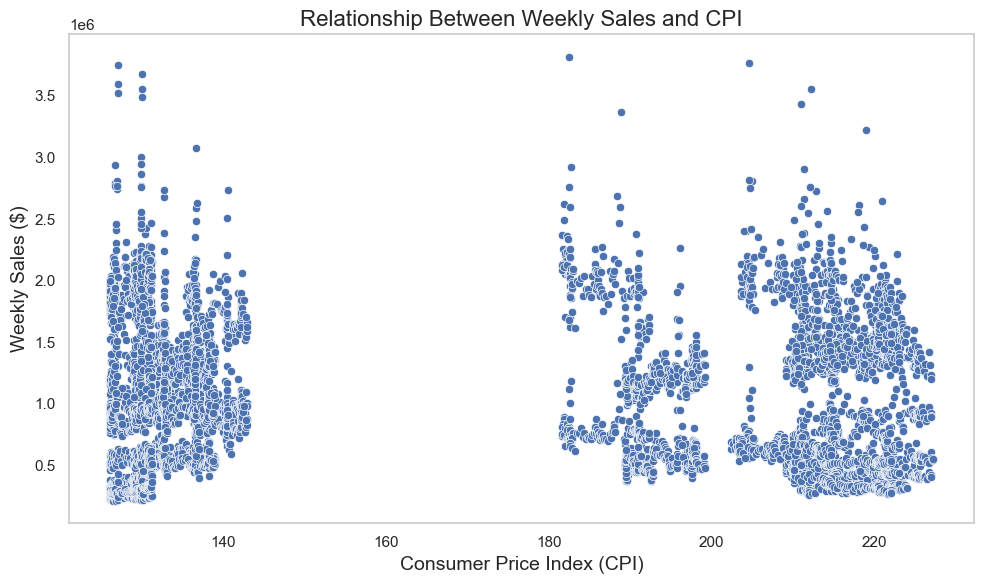

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title("Relationship Between Weekly Sales and CPI", fontsize=16)
plt.xlabel("Consumer Price Index (CPI)", fontsize=14)
plt.ylabel("Weekly Sales ($)", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

There is no correlation between Consumer Price Index (CPI) and Weekly Sales. THe sale range is between 
3.5 millions. The CPI values form distinct clusters leaving the range 150 to 180.

In [85]:
correlation, p_value = pearsonr(df['CPI'], df['Weekly_Sales'])
correlation, p_value

(-0.07263416204017617, 5.438292612176735e-09)

The correlation coefficient of -0.0726 shows a very weak negative relationship between CPI and Weekly Sales. This means that as CPI goes up, Weekly Sales might slightly go down, but the connection is extremely weak. 

The very small p-value (5.44e-09) means this weak relationship is statistically significant.

**Conclusion**: Even though the correlation is significant, it is so weak that CPI doesn’t have a meaningful impact on Weekly Sales. The scatter plot also confirms this, as it shows no clear trend between the two.

---
**Question 9**

Visualize the relationship between Weekly_Sales and Unemployment. Describe the observed relationship. Does it appear that unemployment levels affect weekly sales?

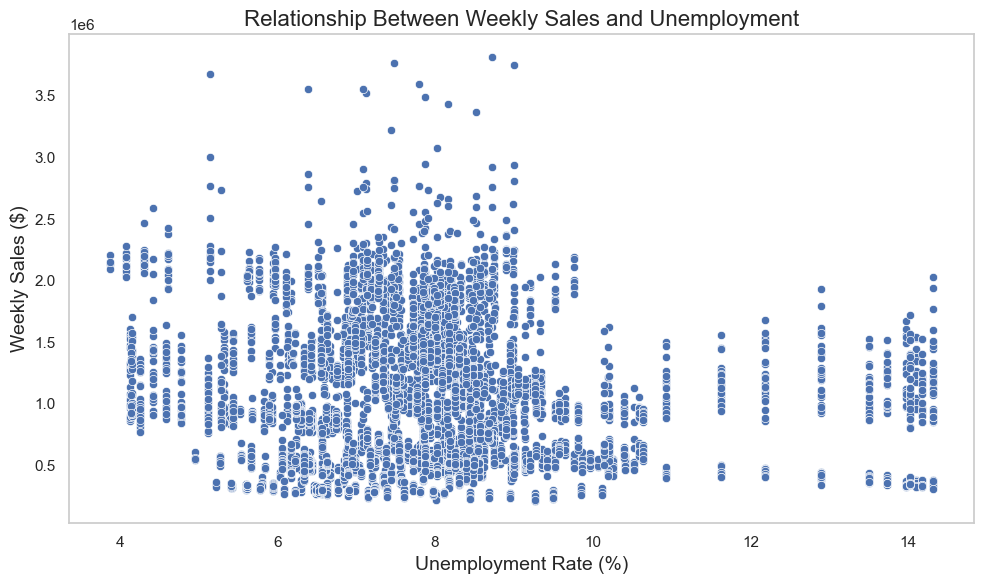

Correlation coefficient between Weekly Sales and Unemployment: -0.11


In [36]:
# Create a scatter plot for Weekly_Sales vs Unemployment
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title("Relationship Between Weekly Sales and Unemployment", fontsize=16)
plt.xlabel("Unemployment Rate (%)", fontsize=14)
plt.ylabel("Weekly Sales ($)", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation coefficient between Weekly Sales and Unemployment: {correlation:.2f}")

The correlation coefficient of -0.11 indicates a weak negative relationship between weekly sales and unemployment levels. As unemployment increases, weekly sales tend to decrease slightly but the relationship is weak. Therefore, the effect of unemployment levels on weekly sales appears to be minimal.

In [94]:
correlation, p_value = pearsonr(df['Unemployment'], df['Weekly_Sales'])
correlation, p_value

(-0.10617608965795447, 1.344836521023328e-17)

---
**Question 10**

Create a new dataframe including Weekly_Sales, CPI, and Unemployment. Calculate the correlation coefficients between Weekly_Sales, CPI, and Unemployment. Which of these features has a stronger relationship with weekly sales, based on the correlation values?
 

In [101]:
df_subset = df[['Weekly_Sales', 'CPI', 'Unemployment']]

correlation_matrix = df_subset.corr()

In [104]:
correlation_matrix

,Weekly_Sales,CPI,Unemployment
Weekly_Sales,1.000000,-0.072634,-0.106176
CPI,-0.072634,1.000000,-0.302020
Unemployment,-0.106176,-0.302020,1.000000


In [106]:
# Calculate correlation coefficients
correlation_matrix = df_subset.corr()

# Display the correlation matrix
print("Correlation Coefficients:\n", correlation_matrix)

# Extracting specific correlations
correlation_with_sales = correlation_matrix['Weekly_Sales']
print("\nCorrelation with Weekly Sales:\n", correlation_with_sales)

Correlation Coefficients:
               Weekly_Sales       CPI  Unemployment
Weekly_Sales      1.000000 -0.072634     -0.106176
CPI              -0.072634  1.000000     -0.302020
Unemployment     -0.106176 -0.302020      1.000000

Correlation with Weekly Sales:
 Weekly_Sales    1.000000
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64


The strongest negative correlation with Weekly_Sales is Store. It means Stores play a key role in influencing sales. CPI and Unemployment show weaker negative correlationswhich meanst there are only minor associations. Holiday_Flag has a weak positive correlation which means holiday weeks have a small but positive influence on sales. Temperature and Fuel_Price do not influence sales trends.


---
**Question 11**

Decompose average monthly sales into trend and seasonable series, using STL. Visualize and describe the trend.

<Figure size 1200x800 with 0 Axes>

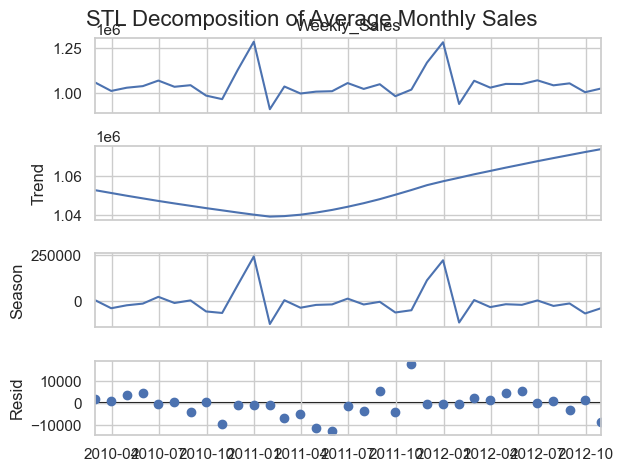

In [44]:
# Resample to calculate average monthly sales
monthly_sales = df['Weekly_Sales'].resample('ME').mean()

# Perform STL decomposition
stl = STL(monthly_sales)
result = stl.fit()

# Plotting the results
plt.figure(figsize=(12,8))
result.plot()
plt.suptitle("STL Decomposition of Average Monthly Sales", fontsize=16)
plt.show()

The trend line shows a decline initially till 04-2011 and then gradually increased during 2012 year end and shows growth in sales.